<a href="https://colab.research.google.com/github/dmassoo/MLT_labs/blob/main/MLT_feb_2022_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

In [176]:
# load data
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [177]:
df = pd.read_csv("/content/drive/MyDrive/MLT/bioresponse.csv")
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

In [178]:
# Features and labels preparation
y = df['Activity']
X = df.drop('Activity', axis = 1)

In [179]:
# Standard features scaling
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [180]:
# Splitting the dataset on train and test (20% of rows)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [181]:
from sklearn import tree

## Part 1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset

### Small tree creation, fitting and quality estimation

In [182]:
# Small tree creation
clf = tree.DecisionTreeClassifier(random_state=1, max_depth = 2)
# Model Learing
clf.fit(X_train, y_train)
# Labels prediction
y_out = clf.predict(X_test)
# Probabilities for the objects in the test sample
y_out_proba = clf.predict_proba(X_test)

In [183]:
# Metrics for binary classification
accuracy = m.accuracy_score(y_test,y_out)
precision = m.precision_score(y_test,y_out)
recall = m.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = m.f1_score(y_test,y_out)
log_loss = m.log_loss(y_test, y_out)

In [184]:
print("Accuracy = " + str(accuracy), "Precision =" + str(precision), "Recall = " + str(recall), "ROC_AUC = " + str(roc_auc), "F1 score = " + str(f1_score), "LogLoss = " + str(log_loss), sep='\n')

Accuracy = 0.7576564580559254
Precision =0.7980997624703088
Recall = 0.7759815242494227
ROC_AUC = 0.7520801842654574
F1 score = 0.7868852459016393
LogLoss = 8.370339906331973


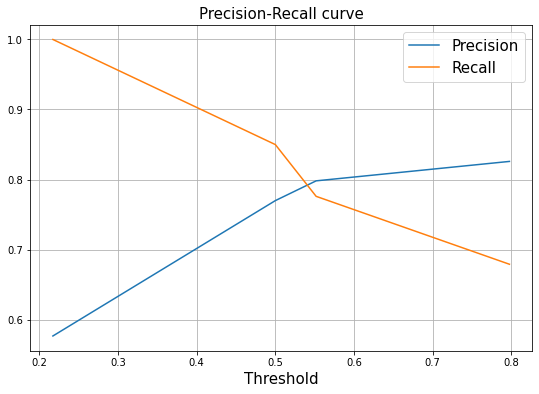

In [185]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

TODO: ROC

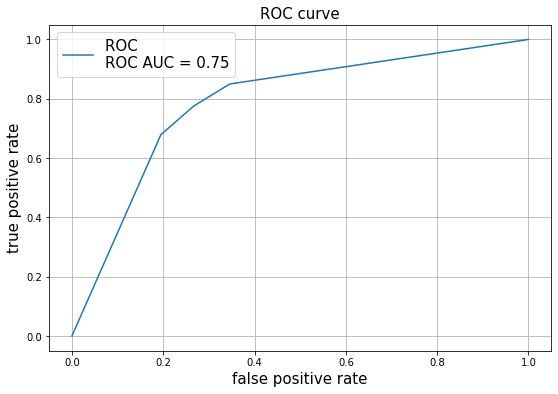

In [186]:
# ROC-curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

### Deep tree

In [187]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth = 40)
# Model Learing
clf.fit(X_train, y_train)
# Labels prediction
y_out = clf.predict(X_test)
# Probabilities for the objects in the test sample
y_out_proba = clf.predict_proba(X_test)
np.shape(y_out_proba)

(751, 2)

In [188]:
# Metrics for binary classification
accuracy = m.accuracy_score(y_test,y_out)
precision = m.precision_score(y_test,y_out)
recall = m.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = m.f1_score(y_test,y_out)
log_loss = m.log_loss(y_test, y_out)

In [189]:
print("Accuracy = " + str(accuracy), "Precision = " + str(precision), "Recall = " + str(recall), "ROC_AUC = " + str(roc_auc), "F1 score = " + str(f1_score), "LogLoss = " + str(log_loss), sep='\n')

Accuracy = 0.7083888149134487
Precision = 0.7535545023696683
Recall = 0.7344110854503464
ROC_AUC = 0.70200521471067
F1 score = 0.7438596491228071
LogLoss = 10.0720042458298


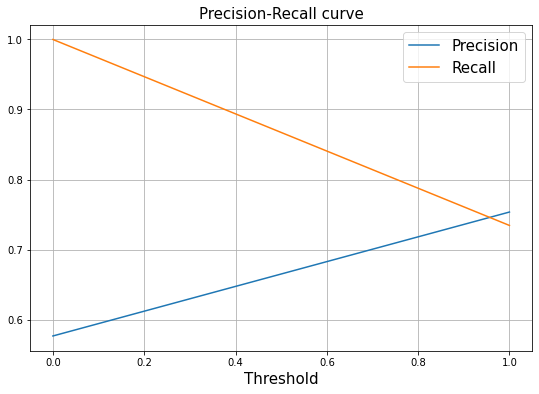

In [190]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

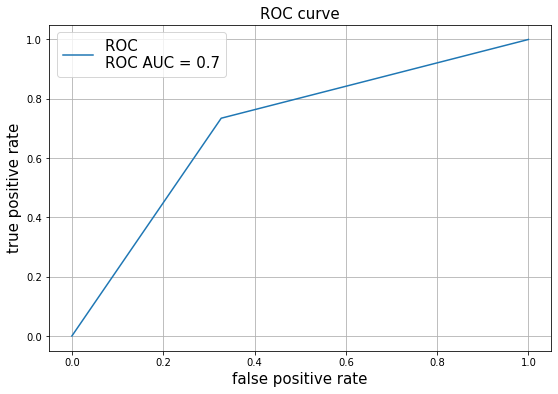

In [191]:
# ROC-curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

As we can see, deep tree has lower metrics than shorter one (we observe slight overfitting here)

### Random forest on small trees

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  learning_curve

In [193]:
rf_classifier_low_depth = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
# Model Learing
rf_classifier_low_depth.fit(X_train, y_train)
# Labels prediction
y_out = rf_classifier_low_depth.predict(X_test)
# Probabilities for the objects in the test sample
y_out_proba = rf_classifier_low_depth.predict_proba(X_test)

In [194]:
# Metrics for binary classification
accuracy = m.accuracy_score(y_test,y_out)
precision = m.precision_score(y_test,y_out)
recall = m.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = m.f1_score(y_test,y_out)
log_loss = m.log_loss(y_test, y_out)

In [195]:
print("Accuracy = " + str(accuracy), "Precision = " + str(precision), "Recall = " + str(recall), "ROC_AUC = " + str(roc_auc), "F1 score = " + str(f1_score), "LogLoss = " + str(log_loss), sep='\n')

Accuracy = 0.7083888149134487
Precision = 0.720164609053498
Recall = 0.8083140877598153
ROC_AUC = 0.7034785309418433
F1 score = 0.7616974972796519
LogLoss = 10.072038316559182


In [196]:
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_low_depth, X_train, y_train, 
                                                                       train_sizes=np.arange(0.1, 1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [197]:
print (train_sizes)
print (train_scores.mean(axis = 1))
print (test_scores.mean(axis = 1))

[ 200  600 1000 1400 1800]
[0.75166667 0.72777778 0.703      0.69928571 0.68722222]
[0.625      0.674      0.662      0.66233333 0.66833333]


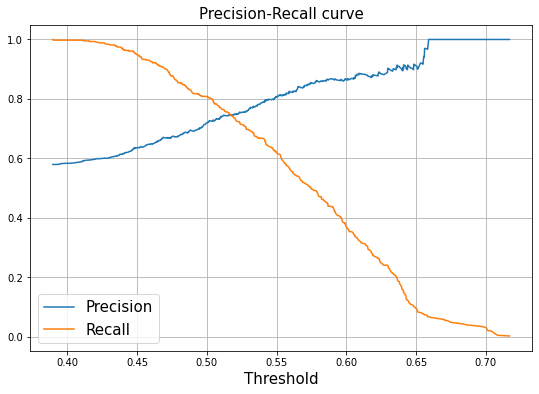

In [198]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

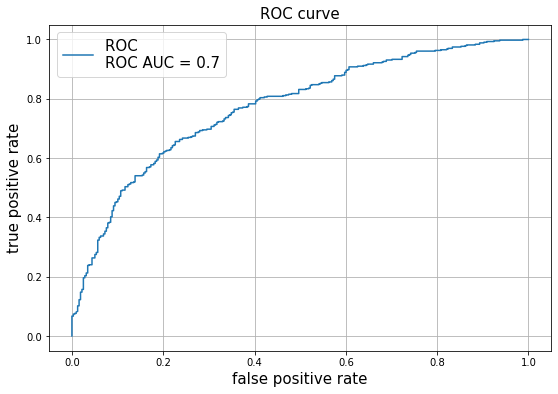

In [199]:
# TODO: ROC
# ROC-curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

### Random forest on deep trees

In [200]:
rf_classifier_high_depth = RandomForestClassifier(n_estimators = 50, max_depth = 40, random_state = 1)
# Model Learing
rf_classifier_high_depth.fit(X_train, y_train)
# Labels prediction
y_out = rf_classifier_high_depth.predict(X_test)
# Probabilities for the objects in the test sample
y_out_proba = rf_classifier_high_depth.predict_proba(X_test)

In [201]:
# Metrics for binary classification
accuracy = m.accuracy_score(y_test,y_out)
precision = m.precision_score(y_test,y_out)
recall = m.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = m.f1_score(y_test,y_out)
log_loss = m.log_loss(y_test, y_out)

In [202]:
print("Accuracy = " + str(accuracy), "Precision = " + str(precision), "Recall = " + str(recall), "ROC_AUC = " + str(roc_auc), "F1 score = " + str(f1_score), "LogLoss = " + str(log_loss), sep='\n')

Accuracy = 0.796271637816245
Precision = 0.8286384976525821
Recall = 0.815242494226328
ROC_AUC = 0.7912423257493679
F1 score = 0.8218859138533178
LogLoss = 7.036606070617495


In [203]:
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_high_depth, X_train, y_train, 
                                                                       train_sizes=np.arange(0.1, 1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [204]:
print (train_sizes)
print (train_scores.mean(axis = 1))
print (test_scores.mean(axis = 1))

[ 200  600 1000 1400 1800]
[1.         1.         0.99933333 1.         0.99962963]
[0.69066667 0.73333333 0.75733333 0.76866667 0.78566667]


We can see that model with depth = 2 is underfitted, since model with depth = 40 has better metrics on test dataset although it obviously overfitted. 

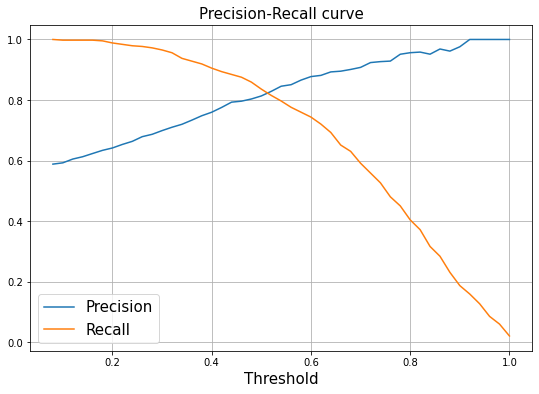

In [205]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

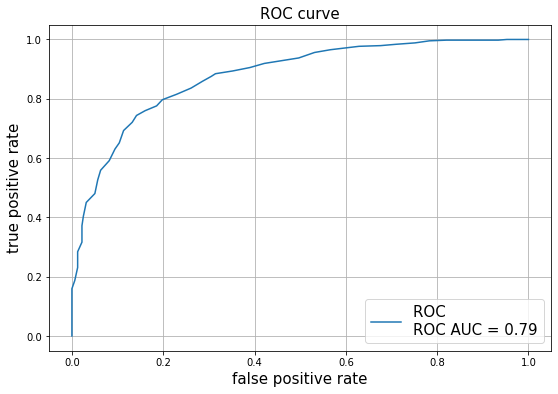

In [206]:
# TODO: ROC
# ROC-curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

# Part 2. Train a classifier that avoids Type II (False Negative) errors and calculate metrics as for previous models

In [207]:
#  Tree creation with weighted classes to increase recall in order to avoid type II errors
clf = tree.DecisionTreeClassifier(random_state=1, max_depth = 2, class_weight = {0: 1, 1: 4})
# Model Learing
clf.fit(X_train, y_train)
# Labels prediction
y_out = clf.predict(X_test)
# Probabilities for the objects in the test sample
y_out_proba = clf.predict_proba(X_test)

In [208]:
# Metrics for binary classification
accuracy = m.accuracy_score(y_test,y_out)
precision = m.precision_score(y_test,y_out)
recall = m.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = m.f1_score(y_test,y_out)
log_loss = m.log_loss(y_test, y_out)

In [209]:
print("Accuracy = " + str(accuracy), "Precision = " + str(precision), "Recall = " + str(recall), "ROC_AUC = " + str(roc_auc), "F1 score = " + str(f1_score), "LogLoss = " + str(log_loss), sep='\n')

Accuracy = 0.5765645805592543
Precision = 0.5769745649263721
Recall = 0.9953810623556582
ROC_AUC = 0.5384872824631861
F1 score = 0.7305084745762712
LogLoss = 14.625277718201781


Recall > 0.95, which was required. However, we lose in precision and even in F1 score.

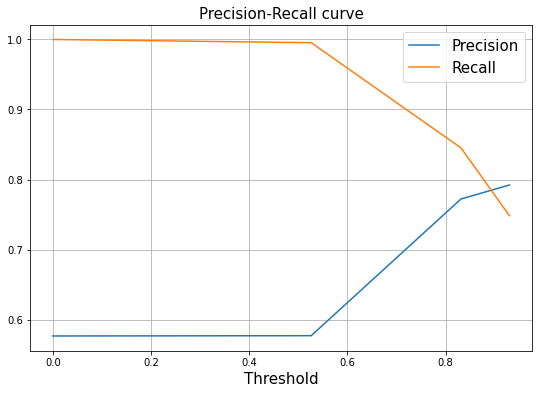

In [210]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

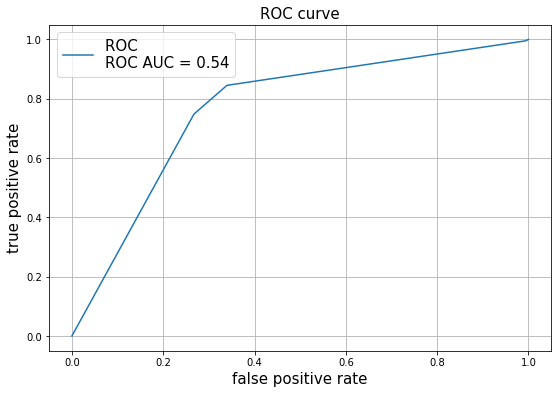

In [211]:
# ROC-curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)